In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [11]:
cv2.__version__

'4.0.0'

In [12]:
# print function 
def img_print(img, cmap=None, interpolation='bicubic'):
    img1 = img[...,::-1].copy()
    plt.imshow(img1, cmap = cmap, interpolation = interpolation)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [13]:
# Reading an image

# load image in grayscale
img = cv2.imread('data/random/0001.jpeg',0)

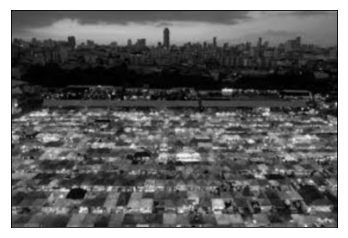

In [14]:
# display an image
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

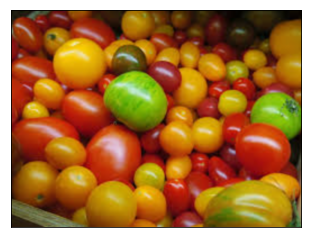

In [15]:
# load image
img1 = cv2.imread('data/random/0002.jpeg')
img1 = img1[...,::-1]
plt.imshow(img1, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#### Some common arguments 

img : The image where you want to draw the shapes

color : Color of the shape. for BGR, pass it as a tuple, eg: (255,0,0) for blue. For grayscale, just pass the scalar value.

thickness : Thickness of the line or circle etc. If -1 is passed for closed figures like circles, it will fill the shape. default thickness = 1

lineType : Type of line, whether 8-connected, anti-aliased line etc. By default, it is 8-connected. cv2.LINE_AA gives anti-aliased line which looks great for curves.



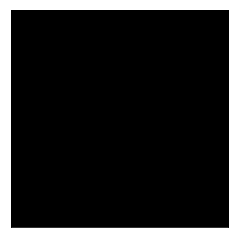

In [16]:
# create a black image
black_img = np.zeros((512,512,3), np.uint8)
img_print(black_img)

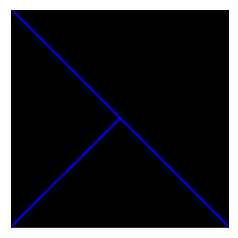

In [17]:
# Drawing a diagonal blue line with thickness of 5 px
img4 = cv2.line(black_img,pt1 = (0,0), pt2 = (511,511),color = (255,0,0),thickness = 3)
img5 = cv2.line(black_img,pt1 = (256,256), pt2 = (0,511),color = (255,0,0),thickness = 3)
img_print(black_img)
# img_print(img5)

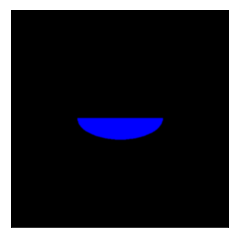

In [18]:
black_img = np.zeros((512,512,3), np.uint8)
img = cv2.ellipse(black_img,(256,256),(100,50),0,0,180,255,-1)
img_print(black_img)

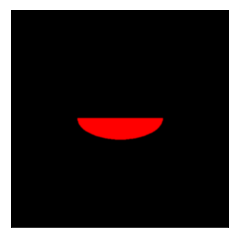

In [28]:
black_img = np.zeros((512,512,3), np.uint8)
ellipse_image = cv2.ellipse(img = black_img,center=(256,256),
                            axes=(100,50),angle=0,startAngle=0,
                            endAngle=180,color=(0,0,255),thickness=-1)
img_print(ellipse_image)

In [3]:
import numpy as np

import cv2
from PIL import Image, ImageChops, ImageOps
import matplotlib.pyplot as plt

from os.path import isfile, join
from os import listdir

In [4]:
def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((10,10)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 0.007, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

In [5]:

def crop_image1(image):
    im = Image.open(image)
    new_im = trim(im)
    new_im=ImageOps.expand(new_im,border=(15,15,15,15),fill='white')
    return new_im

In [6]:
ls tutorial/random/

0001.jpeg  0002.jpeg  0003.jpeg  0004.jpeg


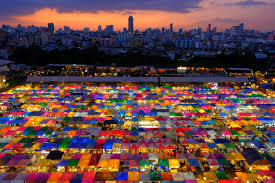

In [7]:
Image.open('tutorial/random/0001.jpeg')

In [13]:
def crop(event,x, y ,flags,param):
    mypath = 'tutorial/random'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath,f))]
    for i in onlyfiles:
        if event == cv2.EVENT_LBUTTONDBLCLK:
            cropped = crop_image1(join(mypath,i))
            print(cropped)
            dir(cropped)
#             cv2.imshow('image',cropped)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',crop)

while(1):
    
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()

<PIL.Image.Image image mode=RGB size=289x224 at 0x7F37EC2A1828>
<PIL.Image.Image image mode=RGB size=305x213 at 0x7F37EC264E80>
<PIL.Image.Image image mode=RGB size=306x213 at 0x7F37EC2A19B0>
<PIL.Image.Image image mode=RGB size=307x212 at 0x7F37EC264EF0>
